<a href="https://colab.research.google.com/github/Raffa-Silva/Testes-treinamento-de-redes/blob/main/Teste_TCN_10_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste realizado com dados desde 2020 para o treinamento, e validação em 2021 utilizando 10 dias de previsão com a rede TCN

In [ ]:
# Importações necessárias
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
import chardet #biblioteca usada para detectar a codificação (encoding) de um conjunto de bytes

#Montando a partição do Google Drive
drive.mount('/content/drive')
file_path1 = '/content/drive/MyDrive/Doutorado/Dados-covid-estado.csv'
file_path2 = '/content/drive/MyDrive/Doutorado/leitos-e-internacoes.csv'

rawdata = open(file_path1, "rb").read()
result = chardet.detect(rawdata)
encoding = result['encoding']

rawdata2 = open(file_path2, "rb").read()
result2 = chardet.detect(rawdata2)
encoding2 = result2['encoding']

#Abrindo um arquivo (tabular) do tipo csv
df_covid_estado = pd.read_csv(file_path1, delimiter=";", encoding=encoding)
df_covid_hospitalizados = pd.read_csv(file_path2, delimiter=";", encoding=encoding)


Mounted at /content/drive


In [ ]:
# Verificar valores ausentes após a remoção
valores_ausentes_casos = df_covid_estado.isna().sum()
valores_ausentes_hosp = df_covid_hospitalizados.isna().sum()

# Exibir os valores ausentes por coluna após a remoção
print(valores_ausentes_casos)
print(valores_ausentes_hosp)

# Verificar quais linhas contêm valores ausentes no DataFrame df_covid_hospitalizados
linhas_com_nan = df_covid_hospitalizados[df_covid_hospitalizados.isnull().any(axis=1)]

# Exibir as linhas com valores ausentes
print(linhas_com_nan)

#preencher os valores NaN
coluna_alvo1 = 'ocupacao_leitos'
coluna_alvo2 = 'pacientes_uti_ultimo_dia'
coluna_alvo3 = 'total_covid_uti_ultimo_dia'
coluna_alvo4 = 'ocupacao_leitos_ultimo_dia'
coluna_alvo5 = 'internacoes_ultimo_dia'
coluna_alvo6 = 'pacientes_enf_ultimo_dia'
coluna_alvo7 = 'total_covid_enf_ultimo_dia'

df_covid_hospitalizados[coluna_alvo1] = pd.to_numeric(df_covid_hospitalizados[coluna_alvo1], errors='coerce') # Converter a coluna para números (ignorando erros para manter as strings como NaN)
df_covid_hospitalizados[coluna_alvo1].fillna(df_covid_hospitalizados[coluna_alvo1].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo2].fillna(df_covid_hospitalizados[coluna_alvo2].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo3].fillna(df_covid_hospitalizados[coluna_alvo3].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo4] = pd.to_numeric(df_covid_hospitalizados[coluna_alvo4], errors='coerce') # Converter a coluna para números (ignorando erros para manter as strings como NaN)
df_covid_hospitalizados[coluna_alvo4].fillna(df_covid_hospitalizados[coluna_alvo4].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo5].fillna(df_covid_hospitalizados[coluna_alvo5].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo6].fillna(df_covid_hospitalizados[coluna_alvo6].mean(), inplace=True)

df_covid_hospitalizados[coluna_alvo7].fillna(df_covid_hospitalizados[coluna_alvo7].mean(), inplace=True)

# Verificar valores ausentes após a remoção
valores_ausentes_casos = df_covid_estado.isna().sum()
valores_ausentes_hosp = df_covid_hospitalizados.isna().sum()

# Exibir os valores ausentes por coluna após a remoção
print(valores_ausentes_casos)
print(valores_ausentes_hosp)




Data              0
Casos             0
Casos por dia     0
Óbitos por dia    0
dtype: int64
Data                           0
nome_drs                       0
ocupacao_leitos               18
pacientes_uti_ultimo_dia      18
total_covid_uti_ultimo_dia    18
ocupacao_leitos_ultimo_dia    18
internacoes_ultimo_dia        18
pacientes_enf_ultimo_dia      18
total_covid_enf_ultimo_dia    18
dtype: int64
             Data                        nome_drs ocupacao_leitos  \
16596  18/04/2023        DRS 01 Grande SÃ£o Paulo             NaN   
16597  18/04/2023               DRS 02 AraÃ§atuba             NaN   
16598  18/04/2023               DRS 03 Araraquara             NaN   
16599  18/04/2023         DRS 04 Baixada Santista             NaN   
16600  18/04/2023                 DRS 05 Barretos             NaN   
16601  18/04/2023                    DRS 06 Bauru             NaN   
16602  18/04/2023                 DRS 07 Campinas             NaN   
16603  18/04/2023                   DRS 08 Fr

In [ ]:
#Combinando dados
common_column = 'Data'
df_combinados = pd.merge(df_covid_estado, df_covid_hospitalizados, how='inner', on=common_column)

print(df_combinados)



             Data    Casos  Casos por dia  Óbitos por dia  \
0      08/10/2020  1022404           5649             215   
1      08/10/2020  1022404           5649             215   
2      08/10/2020  1022404           5649             215   
3      08/10/2020  1022404           5649             215   
4      08/10/2020  1022404           5649             215   
...           ...      ...            ...             ...   
17491  06/06/2023  6621112           1176              25   
17492  06/06/2023  6621112           1176              25   
17493  06/06/2023  6621112           1176              25   
17494  06/06/2023  6621112           1176              25   
17495  06/06/2023  6621112           1176              25   

                             nome_drs  ocupacao_leitos  \
0            DRS 01 Grande SÃ£o Paulo        31.266892   
1                   DRS 02 AraÃ§atuba        31.266892   
2                   DRS 03 Araraquara        31.266892   
3             DRS 04 Baixada Santis

In [ ]:
#a métrica WMAPE (Weighted Mean Absolute Percentage Error)
# é uma adaptação do erro percentual que resolve o problema de dividir por zero
# vamos considerar que o peso de cada observação é o valor absoluto dela

def wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

###Selecionando as colunas para o treinamento

#'Data'
#'Casos por dia'
#'Óbitos por dia'
#'total_covid_uti_ultimo_dia'

# Lista de colunas desejadas
colunas_selecionadas = ['Data', 'Casos por dia', 'Óbitos por dia', 'total_covid_uti_ultimo_dia', 'nome_drs']

# Criar um novo DataFrame apenas com as colunas desejadas
df_combinados2 = df_combinados[colunas_selecionadas]

print(df_combinados2)

#converter a coluna para datetime
df_combinados2['Data'] = pd.to_datetime(df_combinados2['Data'], format='%d/%m/%Y')

#criar variáveis adicionais do dia da semana
#Variáveis específicas da estrutura temporal, como dias da semana, meses e dias do mês
#são importantes para capturar padrões sazonais

weekday = pd.get_dummies(df_combinados2['Data'].dt.weekday)
weekday.columns = ['weekday_' + str(i) for i in range(weekday.shape[1])]

df_combinados2 = pd.concat([df_combinados2, weekday], axis=1)

#A biblioteca neuralforecast espera que as colunas sejam nomeadas dessa forma:
#ds: data do registro
#y: variável alvo (número de vendas)
#unique_id: identificador único da série temporal (categoria do produto)
#O unique_id pode ser qualquer identificador que separe suas séries temporais.

data2 = df_combinados2.rename(columns={'Data': 'ds', 'Casos por dia': 'y', 'nome_drs': 'unique_id'})

#Separamos os dados em treino e validação com uma divisão temporal simples entre passado e futuro.
#A variável h é o horizonte, o número de períodos que queremos prever no futuro.
#Neste caso, é o número de datas únicas na validação (90).

train = data2.loc[data2['ds'] < '2021-10-01']
valid = data2.loc[(data2['ds'] >= '2021-10-01') & (data2['ds'] < '2022-01-01')]
h = valid['ds'].nunique()

!pip install neuralforecast # Instala o módulo neuralforecast

from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoTCN

from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoTCN

#cria uma lista com um único objeto AutoTCN e passa para o objeto NeuralForecast
models = [AutoTCN(h=10,
                  num_samples=30)]

model = NeuralForecast(models=models, freq='D')
model.fit(train)

#o argumento freq define a frequência da série temporal (diária)
#passar os dados de treino para iniciar o treinamento

#O objeto AutoTCN recebe os seguintes argumentos:
#h: o horizonte de previsão (quantos passos no futuro queremos prever)
#num_samples: o número de combinações de hiperparâmetros que serão testadas durante a busca automática

#Com o modelo treinado, podemos fazer as previsões usando o método predict

p = model.predict().reset_index()
p = p.merge(valid[['ds','unique_id', 'y']], on=['ds', 'unique_id'], how='left')


             Data  Casos por dia  Óbitos por dia  total_covid_uti_ultimo_dia  \
0      08/10/2020           5649             215                      4798.0   
1      08/10/2020           5649             215                       120.0   
2      08/10/2020           5649             215                       123.0   
3      08/10/2020           5649             215                       412.0   
4      08/10/2020           5649             215                        91.0   
...           ...            ...             ...                         ...   
17491  06/06/2023           1176              25                        51.0   
17492  06/06/2023           1176              25                        30.0   
17493  06/06/2023           1176              25                        80.0   
17494  06/06/2023           1176              25                        75.0   
17495  06/06/2023           1176              25                      1409.0   

                             nome_drs  

<ipython-input-4-3ae1b02efb81>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combinados2['Data'] = pd.to_datetime(df_combinados2['Data'], format='%d/%m/%Y')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.5 MB/s eta 0:00:00


2023-11-14 18:03:53,041	INFO worker.py:1673 -- Started a local Ray instance.
2023-11-14 18:03:55,193	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
2023-11-14 18:03:55,202	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2023-11-14_18-03-48   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 30                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2023-11-14_18-03-48
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_train_tune_2023-11-14_18-03-48`


(_train_tune pid=2260) Seed set to 3
(_train_tune pid=2260) 2023-11-14 18:04:02.207058: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(_train_tune pid=2260) 2023-11-14 18:04:02.207145: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=2260) 2023-11-14 18:04:02.207188: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(_train_tune pid=2260) 2023-11-14 18:04:02.221646: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(_train_tune pid=2260) To enable the following

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s, v_num=0, train_loss_step=0.356, train_loss_epoch=0.343]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s, v_num=0, train_loss_step=0.258, train_loss_epoch=0.261, valid_loss=5.42e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s, v_num=0, train_loss_step=0.174, train_loss_epoch=0.174, valid_loss=3.87e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 100%|██████████| 1/1 [00:01<00:00,  0.94it/s, v_num=0, train_loss_step=0.119, train_loss_epoch=0.117, valid_loss=4.58e+3]
Validation: |          | 0/? [00:00<?, 

(_train_tune pid=2260) Seed set to 13


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 14.60it/s, v_num=0, train_loss_step=1.020, train_loss_epoch=1.020]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 21.65it/s, v_num=0, train_loss_step=0.680, train_loss_epoch=0.687, valid_loss=7.38e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 22.57it/s, v_num=0, train_loss_step=0.505, train_loss_epoch=0.507, valid_loss=4.23e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 32.69it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 15.54it/s, v_num=0, train_loss_step=0.460, train_loss_epoch=0.461, valid_loss=4.59e

(_train_tune pid=2260) Seed set to 8


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 33.50it/s, v_num=0, train_loss_step=0.792, train_loss_epoch=0.641]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 17.73it/s, v_num=0, train_loss_step=0.316, train_loss_epoch=0.444, valid_loss=4.97e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 21.26it/s, v_num=0, train_loss_step=0.404, train_loss_epoch=0.479, valid_loss=4.05e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 30.91it/s, v_num=0, train_loss_step=0.577, train_loss_epoch=0.534, valid_loss=5.32e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00

(_train_tune pid=2260) Seed set to 16


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 26.87it/s]
                                                                           
Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 14.47it/s, v_num=0, train_loss_step=1.040, train_loss_epoch=1.020]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 13.93it/s, v_num=0, train_loss_step=1.040, train_loss_epoch=1.130, valid_loss=1.17e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 19.24it/s, v_num=0, train_loss_step=0.970, train_loss_epoch=0.940, valid_loss=1.04e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 20.44it/s, v_num=0, train_loss_step=0.838, train_loss_epoch=0.617, valid_loss=9.05e+3]
Validation: |          | 0

(_train_tune pid=2260) Seed set to 18


(_train_tune pid=2260) 
Epoch 499: 100%|██████████| 2/2 [00:00<00:00, 10.67it/s, v_num=0, train_loss_step=0.448, train_loss_epoch=0.464, valid_loss=4.91e+3]
Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  5.69it/s, v_num=0, train_loss_step=0.342, train_loss_epoch=0.329]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Validation DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 16.64it/s]
                                                                      
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  7.87it/s, v_num=0, train_loss_step=0.258, train_loss_epoch=0.267, valid_loss=4.55e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 14.98it/s]
(_train_tune pid=2260) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  8.97it/s, v_num=0, train_loss_step=0.192, train_loss_epoch=0.205, valid_loss=4.57e+3]

(_train_tune pid=2260) Seed set to 19


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 13.13it/s, v_num=0, train_loss_step=0.421, train_loss_epoch=0.442]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=2260) 
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 13.68it/s, v_num=0, train_loss_step=0.314, train_loss_epoch=0.413, valid_loss=5.06e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 11.07it/s]
(_train_tune pid=2260) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 20.09it/s, v_num=0, train_loss_step=0.332, train_loss_epoch=0.305, valid_loss=3.57e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 22.87it/s, v_num=0, train_loss_step=0.277, train_loss_epoch=0.273, valid_loss=5.04e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation Da

(_train_tune pid=2260) Seed set to 4


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  6.16it/s, v_num=0, train_loss_step=0.377, train_loss_epoch=0.372]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s, v_num=0, train_loss_step=0.259, train_loss_epoch=0.257, valid_loss=5.13e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s, v_num=0, train_loss_step=0.228, train_loss_epoch=0.219, valid_loss=4.39e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  6.52it/s, v_num=0, train_loss_step=0.173, train_loss_epoch=0.171, valid_loss=4.35e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/

(_train_tune pid=2260) Seed set to 10


(_train_tune pid=2260) 
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
                                                                           
Training: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 35.50it/s, v_num=0, train_loss_step=0.968, train_loss_epoch=1.150]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 27.63it/s, v_num=0, train_loss_step=0.956, train_loss_epoch=0.648, valid_loss=7.47e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 30.74it/s, v_num=0, train_loss_step=0.759, train_loss_epoch=0.885, valid_loss=4.23e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 

(_train_tune pid=2260) Seed set to 2


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 15.75it/s, v_num=0, train_loss_step=1.140, train_loss_epoch=1.030]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 10.11it/s, v_num=0, train_loss_step=1.200, train_loss_epoch=1.040, valid_loss=1.03e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 10.23it/s, v_num=0, train_loss_step=1.030, train_loss_epoch=1.060, valid_loss=9.98e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 15.74it/s, v_num=0, train_loss_step=0.969, train_loss_epoch=1.030, valid_loss=1.05e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 2/2

(_train_tune pid=2260) Seed set to 5


Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 13.48it/s, v_num=0, train_loss_step=0.630, train_loss_epoch=0.580]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 22.62it/s, v_num=0, train_loss_step=0.436, train_loss_epoch=0.446, valid_loss=4.19e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 20.48it/s, v_num=0, train_loss_step=0.308, train_loss_epoch=0.336, valid_loss=2.8e+3]
(_train_tune pid=2260) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 14.76it/s, v_num=0, train_loss_step=0.292, train_loss_epoch=0.331, valid_loss=4.28e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?i

(_train_tune pid=2260) Seed set to 18


(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 12.58it/s, v_num=0, train_loss_step=0.359, train_loss_epoch=0.371]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  8.35it/s, v_num=0, train_loss_step=0.318, train_loss_epoch=0.296, valid_loss=4.47e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 12.38it/s, v_num=0, train_loss_step=0.242, train_loss_epoch=0.266, valid_loss=2.7e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  8.36it/s, v_num=0, train_loss_step=0.202, train_loss_epoch=0.211, valid_loss=3.09e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 11.91it/s, v_num=0, train_loss_step=0.217, train_loss_epoch=0.194, valid_loss=3.12e+3]
(_train_tune pid=2260) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid

(_train_tune pid=2260) Seed set to 4


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  6.42it/s, v_num=0, train_loss_step=0.283, train_loss_epoch=0.296]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  7.25it/s, v_num=0, train_loss_step=0.203, train_loss_epoch=0.201, valid_loss=4.13e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s, v_num=0, train_loss_step=0.153, train_loss_epoch=0.172, valid_loss=3.98e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s, v_num=0, train_loss_step=0.118, train_loss_epoch=0.132, valid_loss=4.34e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00

(_train_tune pid=2260) Seed set to 2


(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s, v_num=0, train_loss_step=0.652, train_loss_epoch=0.507]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=2260) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s, v_num=0, train_loss_step=0.518, train_loss_epoch=0.416, valid_loss=6.41e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s, v_num=0, train_loss_step=0.365, train_loss_epoch=0.477, valid_loss=5.49e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  5.23it/s, v_num=0, train_loss_ste

(_train_tune pid=2260) Seed set to 13


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 27.94it/s, v_num=0, train_loss_step=0.870, train_loss_epoch=0.914]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 27.56it/s, v_num=0, train_loss_step=0.595, train_loss_epoch=0.579, valid_loss=8.6e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 25.80it/s, v_num=0, train_loss_step=0.404, train_loss_epoch=0.517, valid_loss=6.09e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 36.50it/s, v_num=0, train_loss_step=0.438, train_loss_epoch=0.411, valid_loss=4.67e+3]
(_train_tune pid=2260) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Validation DataLoader 0:   0%|     

(_train_tune pid=2260) Seed set to 11


Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  5.82it/s, v_num=0, train_loss_step=0.438, train_loss_epoch=0.464]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  4.97it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  5.83it/s, v_num=0, train_loss_step=0.347, train_loss_epoch=0.371, valid_loss=5.64e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  5.18it/s]
(_train_tune pid=2260) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  5.53it/s, v_num=0, train_loss_step=0.375, train_loss_epoch=0.345, valid_loss=5.05e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 2/2 [0

(_train_tune pid=2260) Seed set to 16


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 10.16it/s, v_num=0, train_loss_step=0.353, train_loss_epoch=0.356]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  5.73it/s, v_num=0, train_loss_step=0.273, train_loss_epoch=0.256, valid_loss=5.65e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  9.38it/s]
(_train_tune pid=2260) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  5.98it/s, v_num=0, train_loss_step=0.230, train_loss_epoch=0.217, valid_loss=4.41e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00,  5.96it/s, v_num=0, train_loss_step=0.184, train_loss_epoch=0.196, valid_loss=4.15e

(_train_tune pid=2260) Seed set to 5


(_train_tune pid=2260) 
Epoch 49: 100%|██████████| 2/2 [00:00<00:00,  5.86it/s, v_num=0, train_loss_step=0.606, train_loss_epoch=0.536]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00,  5.80it/s, v_num=0, train_loss_step=0.380, train_loss_epoch=0.365, valid_loss=6.12e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00,  5.75it/s, v_num=0, train_loss_step=0.251, train_loss_epoch=0.285, valid_loss=4.47e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00,  5.77it/s, v_num=0, train_loss_step=0.224, train_loss_epoch=0.301, valid_loss=5.33e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader

(_train_tune pid=2260) Seed set to 12


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 21.88it/s, v_num=0, train_loss_step=0.389, train_loss_epoch=0.389]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 57.36it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 16.12it/s, v_num=0, train_loss_step=0.314, train_loss_epoch=0.327, valid_loss=5.65e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 12.84it/s, v_num=0, train_loss_step=0.275, train_loss_epoch=0.282, valid_loss=5.48e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 20.51it/s, v_num=0, train_loss_step=0.252, train_loss_epoch=0.257, valid_loss=5.28e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 38.72it/s]
(_train_tune pid=2260) 
Epoch 249: 100%|██████████| 2

(_train_tune pid=2260) Seed set to 5


(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s, v_num=0, train_loss_step=0.378, train_loss_epoch=0.388]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  4.33it/s, v_num=0, train_loss_step=0.295, train_loss_epoch=0.284, valid_loss=5.05e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s, v_num=0, train_loss_step=0.237, train_loss_epoch=0.250, valid_loss=5.83e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s, v_num=0, train_loss_step=0.205, train_loss_epoch=0.208, valid_loss=5.58e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoade

(_train_tune pid=2260) Seed set to 17


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 15.16it/s, v_num=0, train_loss_step=0.697, train_loss_epoch=0.663]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 17.61it/s, v_num=0, train_loss_step=0.473, train_loss_epoch=0.690, valid_loss=3.62e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 28.27it/s, v_num=0, train_loss_step=0.558, train_loss_epoch=0.481, valid_loss=3.69e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 28.42it/s, v_num=0, train_loss_step=0.391, train_loss_epoch=0.782, valid_loss=2.94e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2

(_train_tune pid=2260) Seed set to 1


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 39.93it/s, v_num=0, train_loss_step=1.250, train_loss_epoch=0.782]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 33.23it/s, v_num=0, train_loss_step=0.693, train_loss_epoch=0.965, valid_loss=7.22e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 59.52it/s, v_num=0, train_loss_step=0.990, train_loss_epoch=1.010, valid_loss=7.94e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 50.94it/s, v_num=0, train_loss_step=1.030, train_loss_epoch=0.748, valid_loss=7.43e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 249: 100%|██████████| 2/2 [00:00<00:00, 62.79it/s, v_num=0, train_loss_step=1.040, train_loss_epoch=0.519, valid_loss=5.95e+3]

(_train_tune pid=2260) Seed set to 9


(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  7.54it/s, v_num=0, train_loss_step=0.788, train_loss_epoch=0.765]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 12.02it/s, v_num=0, train_loss_step=0.599, train_loss_epoch=0.471, valid_loss=9.03e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  7.49it/s, v_num=0, train_loss_step=0.491, train_loss_epoch=0.538, valid_loss=6.48e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 11.32it/s, v_num=0, train_loss_step=0.445, train_loss_epoch=0.429, valid_loss=4.94e+3]
(_train_tune pid=2260) 
Validation: |          | 0/? [00:00<?, ?it

(_train_tune pid=2260) Seed set to 8


(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  6.99it/s, v_num=0, train_loss_step=0.967, train_loss_epoch=0.898]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 12.70it/s, v_num=0, train_loss_step=0.537, train_loss_epoch=0.686, valid_loss=6.67e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  8.38it/s, v_num=0, train_loss_step=0.509, train_loss_epoch=0.536, valid_loss=5.33e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 11.59it/s, v_num=0, train_loss_step=0.385, train_loss_epoch=0.458, valid_loss=3.25e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|████

(_train_tune pid=2260) Seed set to 9


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  4.67it/s, v_num=0, train_loss_step=0.875, train_loss_epoch=0.738]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s, v_num=0, train_loss_step=0.366, train_loss_epoch=0.473, valid_loss=3.66e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  5.00it/s, v_num=0, train_loss_step=0.590, train_loss_epoch=0.365, valid_loss=2.82e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s, v_num=0, train_loss_step=0.479, train_loss_epoch=0.370, valid_loss=4.58e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/

(_train_tune pid=2260) Seed set to 7


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s, v_num=0, train_loss_step=0.463, train_loss_epoch=0.465]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s, v_num=0, train_loss_step=0.390, train_loss_epoch=0.394, valid_loss=4.65e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s, v_num=0, train_loss_step=0.355, train_loss_epoch=0.352, valid_loss=4.53e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s, v_num=0, train_loss_step=0.324, train_loss_epoch=0.330, valid_loss=4.91e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,  4.85it/s, v_num=0, train_loss_step=0.302, train_loss_epoch=0.308, valid_loss=5.42e+3

(_train_tune pid=2260) Seed set to 6


Epoch 49: 100%|██████████| 2/2 [00:00<00:00, 30.59it/s, v_num=0, train_loss_step=1.380, train_loss_epoch=0.906]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 18.85it/s, v_num=0, train_loss_step=1.520, train_loss_epoch=0.860, valid_loss=8.62e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Validation DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  9.50it/s]
(_train_tune pid=2260) 
Epoch 149: 100%|██████████| 2/2 [00:00<00:00, 27.56it/s, v_num=0, train_loss_step=1.280, train_loss_epoch=1.370, valid_loss=7.43e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 2/2 [00:00<00:00, 32.59it/s, v_num=0, train_loss_step=1.230, train_loss_epoch=0.940, valid_loss=7.8e+

(_train_tune pid=2260) Seed set to 5


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 24.33it/s, v_num=0, train_loss_step=0.683, train_loss_epoch=0.591]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 15.29it/s, v_num=0, train_loss_step=0.340, train_loss_epoch=0.536, valid_loss=2.65e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 17.78it/s, v_num=0, train_loss_step=0.809, train_loss_epoch=0.478, valid_loss=2.61e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 14.93it/s, v_num=0, train_loss_step=0.401, train_loss_epoch=0.473, valid_loss=4.05e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/

(_train_tune pid=2260) Seed set to 6


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s, v_num=0, train_loss_step=0.383, train_loss_epoch=0.377]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s, v_num=0, train_loss_step=0.290, train_loss_epoch=0.281, valid_loss=4.05e+3]
(_train_tune pid=2260) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:01<00:00,  0.84it/s, v_num=0, train_loss_step=0.247, train_loss_epoch=0.248, valid_loss=5.34e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s, v_num=0, train_loss_step=0.198, train_loss_epoch=0.203, valid_loss=4.96e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoade

(_train_tune pid=2260) Seed set to 2


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 15.13it/s, v_num=0, train_loss_step=1.070, train_loss_epoch=0.881]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 18.50it/s, v_num=0, train_loss_step=0.703, train_loss_epoch=0.711, valid_loss=1.03e+4]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 21.94it/s, v_num=0, train_loss_step=0.483, train_loss_epoch=0.640, valid_loss=8.48e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 15.65it/s, v_num=0, train_loss_step=0.425, train_loss_epoch=0.515, valid_loss=6.56e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 17.42it/s, v_num=0, train_loss_step=0.451, train_loss_epoch=0.479, valid_loss=4.93e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 499: 100%|██████████| 1/1 [00:00<

(_train_tune pid=2260) Seed set to 19


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s, v_num=0, train_loss_step=0.300, train_loss_epoch=0.315]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  4.37it/s, v_num=0, train_loss_step=0.219, train_loss_epoch=0.218, valid_loss=6.26e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s, v_num=0, train_loss_step=0.167, train_loss_epoch=0.155, valid_loss=6.17e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2260) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  6.18it/s, v_num=0, train_loss_step=0.119, train_loss_epoch=0.122, valid_loss=6.59e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s, v_num=0, train_loss_step=0.139, train_loss_epoch=0.103, valid_loss=6.99e+3

INFO:lightning_fabric.utilities.seed:Seed set to 18


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

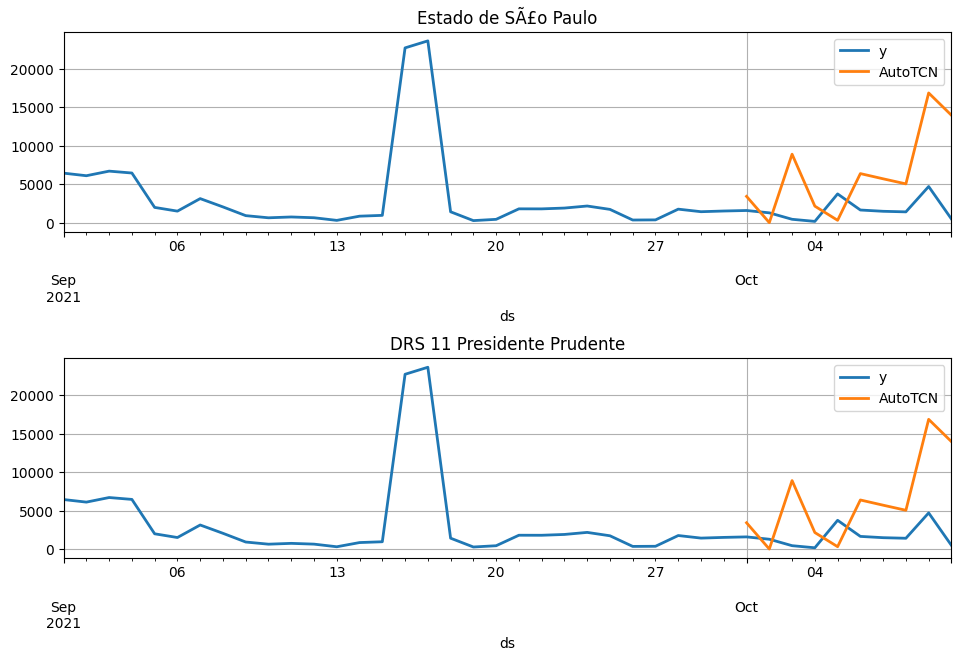

In [ ]:
# Supondo que 'p' contém as previsões
p['ds'] = pd.to_datetime(p['ds'])  # Certifique-se de que a coluna ds é do tipo datetime
p = p.sort_values(by='ds')  # Ordene o DataFrame pelo campo de data ds

fig, ax = plt.subplots(2, 1, figsize = (1080/96, 720/96))
fig.tight_layout(pad=7.0)
for ax_i, unique_id in enumerate(['Estado de SÃ£o Paulo', 'DRS 11 Presidente Prudente']):
    plot_df = pd.concat([train.loc[train['unique_id'] == unique_id].tail(30),
                         p.loc[p['unique_id'] == unique_id]]).set_index('ds') # Concatenate the train and forecast dataframes
    plot_df[['y', 'AutoTCN']].plot(ax=ax[ax_i], legend=['d','t'], linewidth=2, title=unique_id)


    ax[ax_i].grid()

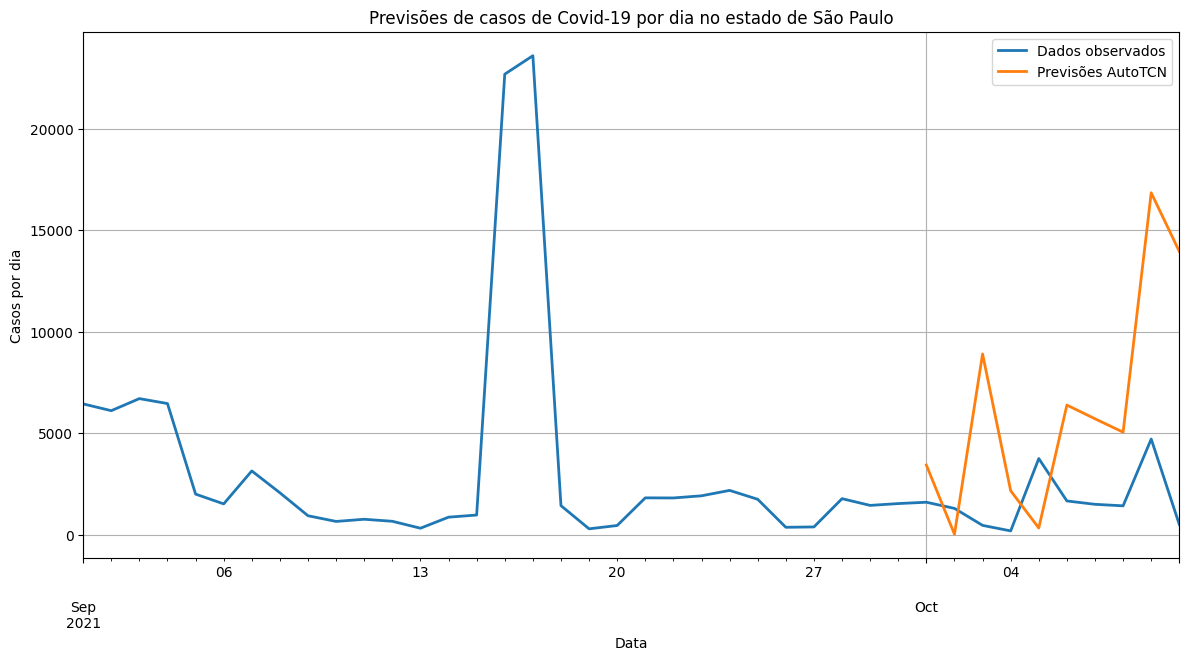

In [ ]:
import matplotlib.pyplot as plt
# Supondo que 'p' contém as previsões
p['ds'] = pd.to_datetime(p['ds'])  # Certifique-se de que a coluna ds é do tipo datetime
p = p.sort_values(by='ds')  # Ordene o DataFrame pelo campo de data ds

# Assuming 'train' and 'p' are your dataframes
fig, ax = plt.subplots(figsize=(1280/96, 720/96))
fig.tight_layout(pad=7.0)

unique_id = 'Estado de SÃ£o Paulo'  # Set the specific ID you want to plot

plot_df = pd.concat([train.loc[train['unique_id'] == unique_id].tail(30),
                     p.loc[p['unique_id'] == unique_id]]).set_index('ds')  # Concatenate the train and forecast dataframes

# Plot the 'y' column with a custom label
plot_df['y'].plot(ax=ax, linewidth=2, label='Dados observados')

# Plot the 'AutoTCN' column with a custom label
plot_df['AutoTCN'].plot(ax=ax, linewidth=2, label='Previsões AutoTCN')

# Add legend
ax.legend()

ax.set_title(unique_id)
ax.grid()

# Renomear os eixos
ax.set_xlabel('Data')
ax.set_ylabel('Casos por dia')


# Definir título do gráfico
ax.set_title('Previsões de casos de Covid-19 por dia no estado de São Paulo')

plt.show()


In [ ]:
#Verificar o WMAPE da melhor combinação sobre os dados de validação

print(wmape(p['y'], p['AutoTCN']))

3.190402059086759


In [ ]:
print(p)

                    unique_id         ds       AutoTCN     y
0    DRS 01 Grande SÃ£o Paulo 2021-10-01   3445.468262  1616
1    DRS 01 Grande SÃ£o Paulo 2021-10-02     42.921875  1313
2    DRS 01 Grande SÃ£o Paulo 2021-10-03   8910.882812   477
3    DRS 01 Grande SÃ£o Paulo 2021-10-04   2180.904297   205
4    DRS 01 Grande SÃ£o Paulo 2021-10-05    346.787598  3765
..                        ...        ...           ...   ...
175      Estado de SÃ£o Paulo 2021-10-06   6396.272461  1679
176      Estado de SÃ£o Paulo 2021-10-07   5721.575684  1513
177      Estado de SÃ£o Paulo 2021-10-08   5063.289551  1439
178      Estado de SÃ£o Paulo 2021-10-09  16841.353516  4724
179      Estado de SÃ£o Paulo 2021-10-10  13954.208008   518

[180 rows x 4 columns]


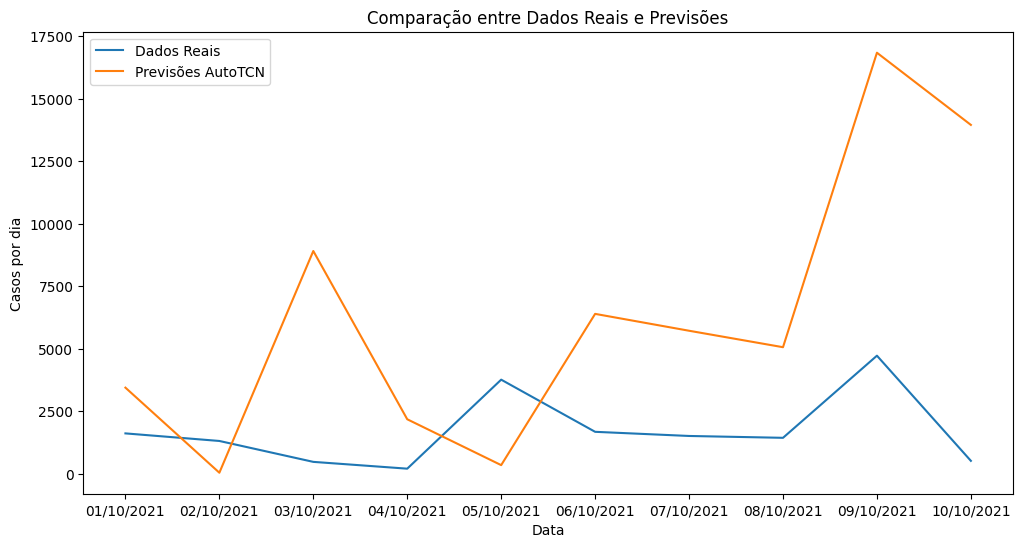

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Supondo que 'p' contém as previsões
p['ds'] = pd.to_datetime(p['ds'])  # Certifique-se de que a coluna ds é do tipo datetime
p = p.sort_values(by='ds')  # Ordene o DataFrame pelo campo de data ds

# Agora, você pode plotar o gráfico sem a linha voltar ao início
plt.figure(figsize=(12, 6))
plt.plot(p['ds'], p['y'], label='Dados Reais')
plt.plot(p['ds'], p['AutoTCN'], label='Previsões AutoTCN')
plt.title('Comparação entre Dados Reais e Previsões')
plt.xlabel('Data')
plt.ylabel('Casos por dia')
plt.legend()

# Formatar eixo x para exibir datas no formato 'dd/mm/yyyy'
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(p['y'], p['AutoTCN'])
mse = mean_squared_error(p['y'], p['AutoTCN'])
rmse = mean_squared_error(p['y'], p['AutoTCN'], squared=False)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 5503.12451171875
MSE: 47214099.103216074
RMSE: 6871.251640219275
